# **Project Data Mining**

## **Data Prediksi Penyakit Gagal Jantung**

## **1. Business Understanding**

Penyakit kardiovaskular (CVD) merupakan masalah kesehatan utama di  dunia dan penyebab utama kematian dengan sekitar 17,9 juta jiwa meninggal setiap tahun, yang setara dengan 31% dari total kematian global. Gagal jantung adalah salah satu akibat umum dari CVD. Orang dengan penyakit kardiovaskular atau risiko tinggi (seperti hipertensi, diabetes, atau hiperlipidemia) memerlukan deteksi dan manajemen dini. Model machine learning dapat membantu mengatasi masalah ini secara otomatis. 

Dimana tujuannya Untuk mengklasifikasikan/memprediksi apakah seorang pasien rentan terhadap gagal jantung berdasarkan beberapa faktor. Serta klasifikasi biner dengan beberapa fitur numerik dan kategorikal. 

In [1]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

## **2. Data Understanding**

Gagal jantung atau penyakit jantung koroner merupakan kondisi serius yang dapat disebabkan oleh berbagai faktor. Berikut adalah penjelasan dari setiap faktor yang dapat mempengaruhi risiko penyakit jantung berdasarkan data yang diberikan:

- **Age (Usia)**:
Usia yang lebih tua biasanya meningkatkan risiko penyakit jantung karena akumulasi kerusakan pada pembuluh darah dan jantung seiring waktu.

- **Sex (Jenis Kelamin)**:
Jenis kelamin dapat mempengaruhi risiko penyakit jantung. Misalnya, pria cenderung memiliki risiko lebih tinggi untuk penyakit jantung koroner pada usia lebih muda dibandingkan wanita, namun setelah menopause, risiko wanita meningkat dan bisa mendekati atau bahkan melampaui pria.

- **Chest Pain Type (Tipe Nyeri Dada)**:
Tipe nyeri dada (misalnya, angina stabil, angina tidak stabil, atau angina varian) memberikan indikasi tentang seberapa parah aliran darah ke jantung terganggu. Nyeri dada yang sering dan parah bisa menjadi tanda penyakit jantung yang signifikan.

- **Resting BP (Tekanan Darah Istirahat)**:
Tekanan darah tinggi (hipertensi) adalah faktor risiko utama untuk penyakit jantung karena dapat merusak arteri dan meningkatkan beban kerja jantung.

- **Cholesterol (Kolesterol)**:
Kolesterol tinggi, terutama LDL (kolesterol jahat), dapat menyebabkan penumpukan plak di arteri, yang bisa mengakibatkan aterosklerosis dan meningkatkan risiko serangan jantung.

- **Fasting BS (Gula Darah Puasa)**:
Gula darah puasa yang tinggi adalah indikator diabetes atau pra-diabetes, yang merupakan faktor risiko signifikan untuk penyakit jantung karena dapat merusak pembuluh darah dan saraf jantung.

- **Resting ECG (Elektrokardiogram Istirahat)**:
Hasil abnormal dari EKG istirahat bisa menunjukkan adanya masalah listrik atau struktural di jantung, seperti aritmia atau kerusakan jantung akibat serangan jantung sebelumnya.

- **MaxHR (Detak Jantung Maksimal)**:
Detak jantung maksimal yang lebih rendah dari yang diharapkan selama latihan bisa menunjukkan kondisi jantung yang tidak sehat. Sebaliknya, kapasitas jantung untuk bekerja keras tanpa masalah bisa menunjukkan jantung yang lebih sehat.

- **Exercise Angina (Angina Saat Latihan)**:
Jika seseorang mengalami angina (nyeri dada) selama aktivitas fisik, ini menunjukkan bahwa jantung tidak mendapatkan cukup darah dan oksigen selama stres fisik, yang bisa menjadi tanda penyakit arteri koroner.

- **Oldpeak (Penurunan ST Segment pada EKG)**:
Oldpeak mengacu pada perubahan segmen ST pada EKG yang terjadi saat latihan dibandingkan dengan saat istirahat. Penurunan yang signifikan dapat menunjukkan iskemia, yaitu kurangnya aliran darah ke jantung.

- **ST Slope (Kemiringan ST Segment pada EKG)**:
Kemiringan segmen ST pada EKG juga dapat memberikan indikasi tentang kesehatan jantung. Misalnya, kemiringan yang menurun bisa mengindikasikan iskemia.

- **Heart Disease (Penyakit Jantung)**:
Ini adalah hasil akhir yang menunjukkan apakah seseorang memiliki penyakit jantung atau tidak. Penyakit jantung ini adalah hasil dari kombinasi faktor-faktor risiko yang disebutkan di atas.


In [11]:
#pemanggilan data
data = pd.read_csv("C:\\Users\\ASUS VIVOBOOK\\Downloads\\heart (1).csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [12]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


# 3. Data Preparation

Berdasarkan data yang kami punya, kami telah melakukan preprocessing dengan mencari missing value, one hot encoding dan visualization data.

### **3.1 Deteksi Missing Value**

In [14]:
# Menampilkan informasi umum tentang dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


Berdasarkan analisis di atas, data yang kami punya tidak memiliki missing value.

## **3.2 One-Hot Encoding**

In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Asumsikan `data` adalah DataFrame Anda dan `categorical_features` adalah daftar kolom kategorikal
fitur_kategorikal = ['Age', 'Sex',]  # Ganti dengan nama fitur kategorikal Anda

# Memilih data kategorikal
data_kategorikal = data[fitur_kategorikal]

# One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' menghindari multicollinearity
data_encoded = encoder.fit_transform(data_kategorikal)

# Mengubah data yang di-encode menjadi DataFrame
encoded_df = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(fitur_kategorikal))

# Menghapus fitur kategorikal asli dari data asli dan menggabungkan fitur yang sudah di-encode
data_terencode = pd.concat([data.drop(columns=fitur_kategorikal), encoded_df], axis=1)

# Sekarang `data_terencode` mengandung data asli dengan fitur kategorikal yang sudah di-encode
print(data_terencode.head())


  ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0           ATA        140          289          0     Normal    172   
1           NAP        160          180          0     Normal    156   
2           ATA        130          283          0         ST     98   
3           ASY        138          214          0     Normal    108   
4           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  ...  Age_69  Age_70  Age_71  \
0              N      0.0       Up             0  ...     0.0     0.0     0.0   
1              N      1.0     Flat             1  ...     0.0     0.0     0.0   
2              N      0.0       Up             0  ...     0.0     0.0     0.0   
3              Y      1.5     Flat             1  ...     0.0     0.0     0.0   
4              N      0.0       Up             0  ...     0.0     0.0     0.0   

   Age_72  Age_73  Age_74  Age_75  Age_76  Age_77  Sex_M  
0     0.0     0.0    

C:\Users\ASUS VIVOBOOK\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Asumsikan `data` adalah DataFrame Anda dan `categorical_features` adalah daftar kolom kategorikal
fitur_kategorikal = ['Age', 'Cholesterol',]  # Ganti dengan nama fitur kategorikal Anda

# Memilih data kategorikal
data_kategorikal = data[fitur_kategorikal]

# One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' menghindari multicollinearity
data_encoded = encoder.fit_transform(data_kategorikal)

# Mengubah data yang di-encode menjadi DataFrame
encoded_df = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(fitur_kategorikal))

# Menghapus fitur kategorikal asli dari data asli dan menggabungkan fitur yang sudah di-encode
data_terencode = pd.concat([data.drop(columns=fitur_kategorikal), encoded_df], axis=1)

# Sekarang `data_terencode` mengandung data asli dengan fitur kategorikal yang sudah di-encode
print(data_terencode.head())

  Sex ChestPainType  RestingBP  FastingBS RestingECG  MaxHR ExerciseAngina  \
0   M           ATA        140          0     Normal    172              N   
1   F           NAP        160          0     Normal    156              N   
2   M           ATA        130          0         ST     98              N   
3   F           ASY        138          0     Normal    108              Y   
4   M           NAP        150          0     Normal    122              N   

   Oldpeak ST_Slope  HeartDisease  ...  Cholesterol_412  Cholesterol_417  \
0      0.0       Up             0  ...              0.0              0.0   
1      1.0     Flat             1  ...              0.0              0.0   
2      0.0       Up             0  ...              0.0              0.0   
3      1.5     Flat             1  ...              0.0              0.0   
4      0.0       Up             0  ...              0.0              0.0   

   Cholesterol_458  Cholesterol_466  Cholesterol_468  Cholesterol_491  \
0

C:\Users\ASUS VIVOBOOK\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## **3.3 Visualisasi Data**

In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
df1 = pd.DataFrame(data)
df1_encoded = pd.get_dummies(df1, columns=['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1_encoded['Oldpeak'] = mms.fit_transform(df1_encoded[['Oldpeak']])
df1_encoded['Age'] = ss.fit_transform(df1_encoded[['Age']])
df1_encoded['RestingBP'] = ss.fit_transform(df1_encoded[['RestingBP']])
df1_encoded['Cholesterol'] = ss.fit_transform(df1_encoded[['Cholesterol']])
df1_encoded['MaxHR'] = ss.fit_transform(df1_encoded[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


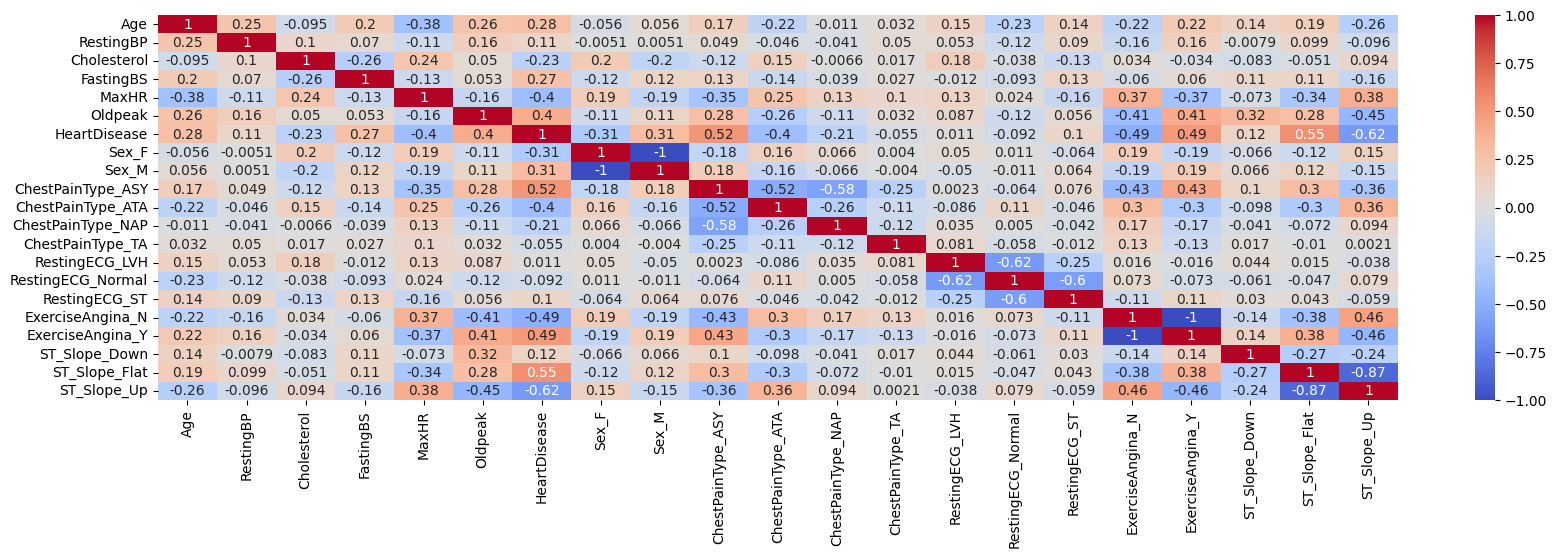

In [39]:
plt.figure(figsize=(20, 5))
sns.heatmap(df1_encoded.corr(), cmap='coolwarm', annot=True)
plt.show()


*   Warna merah menunjukkan korelasi positif
*   Warna biru menunjukkan korelasi negatif
*   Korelasi antara **Age** dan **RestingBP** adalah 0.25 yang berarti ada korelasi positif antara usia dan tekanan darah saat istirahat.
*   Korelasi antara **MaxHR** dan **HeartDisease** adalah -0.4 yang berarti ada korelasi negatif antara denyut jantung maksimum dan penyakit jantung (semakin tinggi denyut jantung maksimum, maka semakin rendah kemungkinan penyakit jantung)



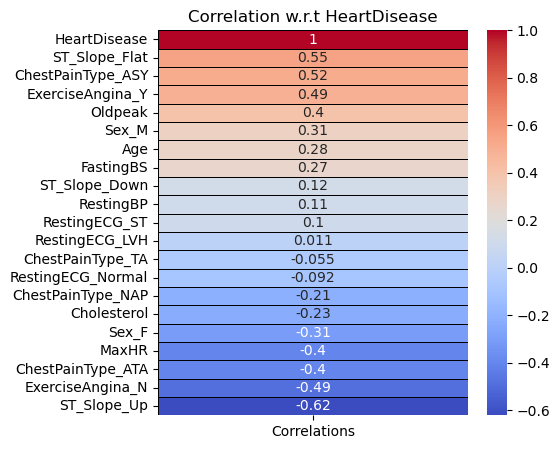

In [18]:
corr = df1_encoded.corrwith(df1_encoded['HeartDisease']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black')
plt.title('Correlation w.r.t HeartDisease')
plt.show()


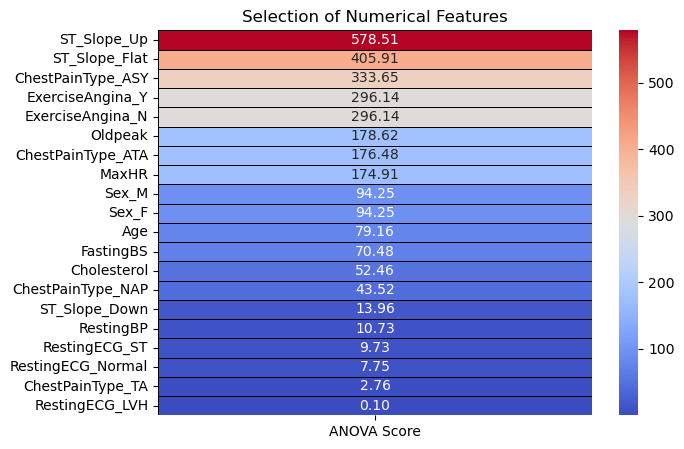

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Memilih fitur-fitur numerik dan target
features = df1_encoded.drop(columns=['HeartDisease'])
target = df1_encoded['HeartDisease']

# Memilih fitur terbaik menggunakan ANOVA
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

# Membuat DataFrame untuk menyimpan skor ANOVA
featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

# Menampilkan heatmap untuk visualisasi skor ANOVA dengan palet warna yang sesuai
plt.subplots(figsize=(7, 5))
sns.heatmap(featureScores.sort_values(by='ANOVA Score', ascending=False), annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')
plt.show()



**ST_Slope_Up** memiliki anova score yang tertinggi dan **RestingECG_LVH** memiliki anova score terendah.

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


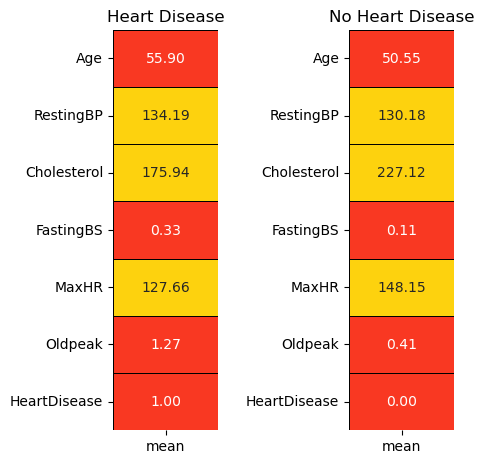

In [22]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

Visualisasi di atas menunjukkan rata-rata dari beberapa faktor untuk orang dengan penyakit gagal jantung dan juga orang tanpa penyakit gagal jantung.

In [23]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

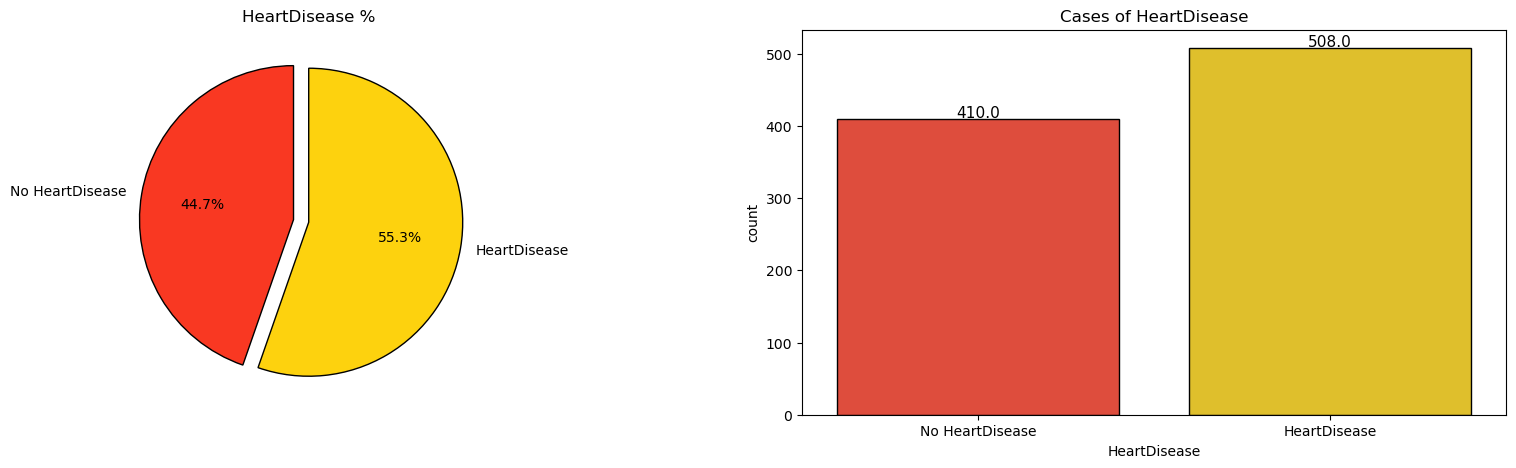

In [25]:
# Hitung jumlah kasus heart disease dan non heart disease
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Plot pie chart
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No HeartDisease', 'HeartDisease'], autopct='%1.1f%%', startangle=90,
        explode=(0.1, 0), colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('HeartDisease %')

# Plot count plot
plt.subplot(1, 2, 2)
ax = sns.countplot(x='HeartDisease', data=data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No HeartDisease', 'HeartDisease'])
plt.title('Cases of HeartDisease')

plt.show()


Dari responden yang terdapat pada data tersebut, menjelaskan bahwa lebih banyak responden yang memiliki penyakit gagal jantung dibandingkan dengan responden yang tidak memillki penyakit gagal jantung

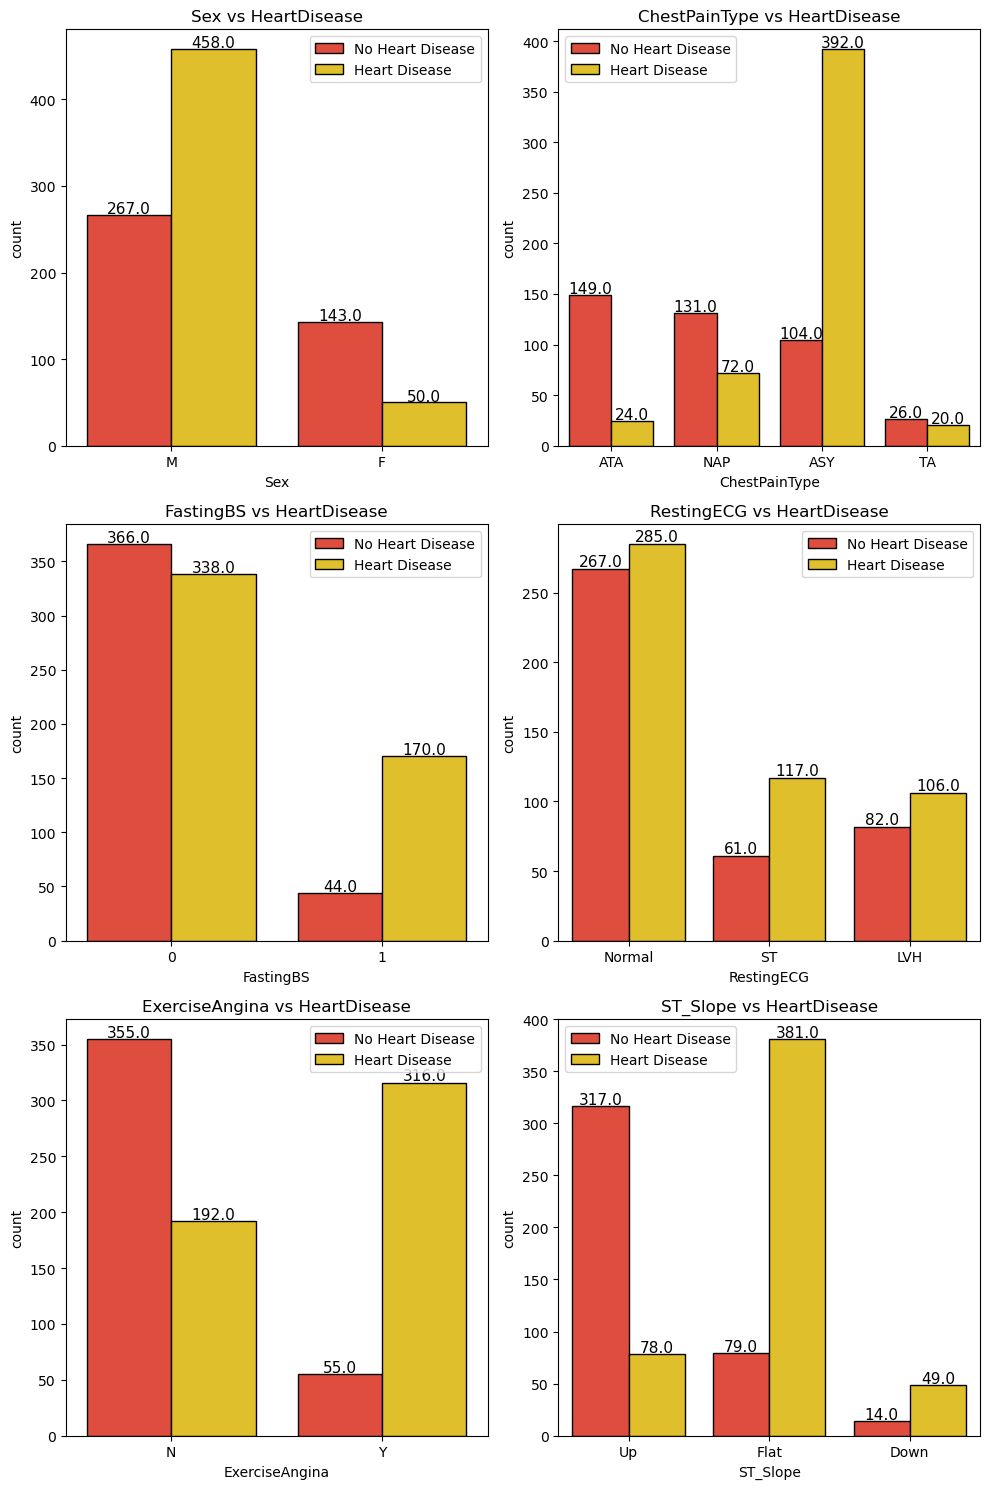

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize= (10, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to a 1D array for easier indexing

for i in range(len(categorical_features)-1):
    ax = axes[i]
    sns.countplot(x=categorical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black', ax=ax)

    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center', fontsize=11)

    title = f'{categorical_features[i]} vs HeartDisease'
    ax.set_title(title)
    ax.legend(['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()


Dari gambar diagram di atas dapat diketahui bahwa :
1.  Gambar diagram 1 menggambarkan hubungan antara Sex dengan HeartDiases di mana pria mengalami gagal jantung lebih tinggi dibandingkan wanita
2.  Gambar diagaram 2 menggambarkan hubungan antara ChestPainType dengan HeartDiases di mana jumlah responden dengan jenis nyeri dada tipe ATA, NAP, dan TA lebih banyak yang tidak mengalami gagal jantung sedangkan responden dengan jenis nyeri dada tipe ASY lebih banyak yang mengalami gagal jantung.
3. Gambar diagram 3 menggambarkan hubungan FastingBS dengan HeartDiases di mana jumlah responden dengan kategori 0 (gula darah >120 mg/dl) lebih banyak yang bukan penderita gagal jantung, sedangkan responden dengan kategori 1 (gula darah <120 mg/dl) lebih banyak yang merupakan penderita gagal jantung
4. Gambar diagram 4 menggambarkan hubungan Resting ECG dengan HeartDiases di mana tingkat elektrokardiogram Istirahat responden dengan kategori Normal, ST, LVH lebih banyak responden yang mengalami gagal jantung.
5. Gambar diagram 5 menggambarkan hubungan ExerciseAngina dengan HeartDiases di mana responden penderita gagal jantung yang mengalami nyeri dada saat aktivitas fisik (Y) lebih banyak yang merupakan penderita gagal jantung, sedangkan responden penderita gagal jantung yang tidak mengalami nyeri dada saat aktivitas fisik (N) lebih banyak yang bukan penderita gagal jantung.
6. Gambar diagram 6 menggambarkan hubungan ST_Slope dengan HeartDiases di mana kategori kemiringan ST yaitu Flat dan Down memiliki jumlah responden yang lebih banyak merupakan penderita gagal jantung sedangkan kategori Up memiliki jumlah responden lebih banyak yang bukan penderita gagal jantung.


In [28]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]
slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_2312\1626816102.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)
C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_2312\1626816102.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,2)
C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_2312\1626816102.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,3)
C:\Users\ASUS VIVOBOOK\AppData\Local\Temp\ipykernel_2312\1626816102.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releas

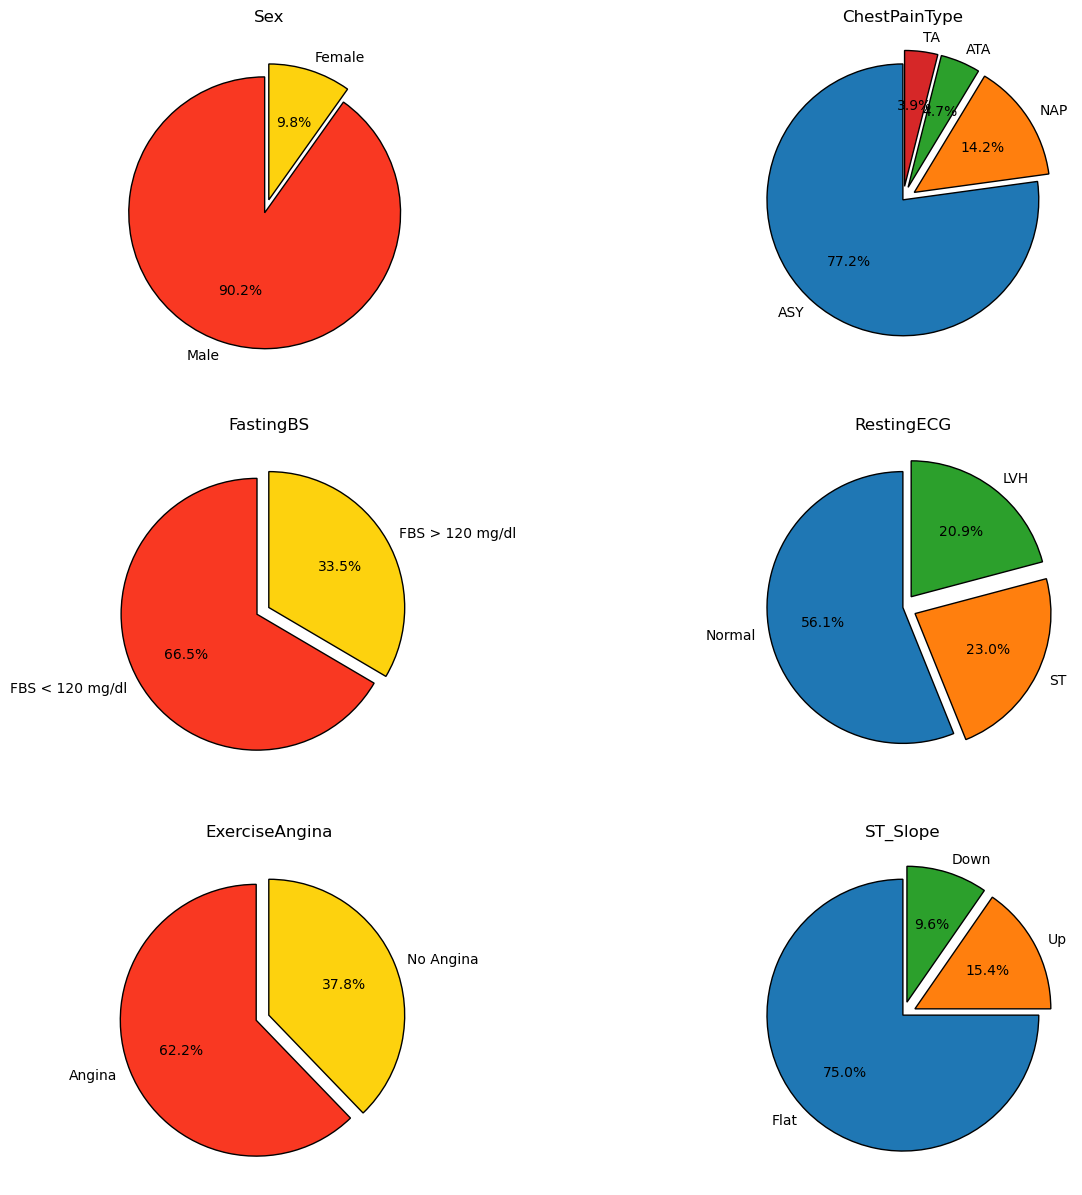

In [29]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');
plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');
plt.subplot(3,2,5)
plt.pie(exang,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

Berikut penjelasan dari pie chart di atas :
*   Pada diagram **jenis kelamin**, menunjukkan bahwa responden pria lebih banyak mengalami gagal jantung dibandingkan dengan responden wanita.

*   Pada diagram **jenis nyeri dada**, terdapat 4 kategori :
    1. **TA (Typical Angina)** : jenis nyeri dada yang berkaitan dengan jantung koroner, nyeri dada yang muncul karena aktivitas fisik atau stress, biasanya mereda dengan istirahat atau obat nitrogliserin, gejalanya termasuk rasa sakit atau tekanan di dada yang mungkin menyebar ke lengan, leher, rahang, atau punggung.
    2. **ATA (Atypical Angina)**: berhubungan dengan penyakit jantung tetapi gejalanya tidak khas seperti pada angina tipikal, nyeri dada ini mungkin tidak dipicu oleh aktivitas fisik dan tidak selalu mereda dengan istirahat atau obat, gejalanya bisa berupa rasa sakit di dada yang tidak spesifik dan mungkin tidak menyebar ke bagian tubuh lain.
    3. **NAP (Non-Anginal Pain)**: tidak berhubungan dengan penyakit jantung koroner, nyeri dada ini bisa disebabkan oleh berbagai kondisi lain seperti masalah gastrointestinal, muskuloskeletal, atau masalah paru-paru, gejalanya bervariasi dan mungkin termasuk nyeri yang tidak teratur, rasa sakit tajam, atau ketidaknyamanan di dada.
    4. **ASY (Asymptomatic)**: individu tidak mengalami gejala nyeri dada sama sekali, orang dengan kategori ini mungkin memiliki penyakit jantung atau faktor risiko jantung tanpa mengalami gejala yang dapat dirasakan.

     Pada diagram tersebut menunjukkan bahwa responden paling banyak memiliki kategori jenis nyeri dada yaitu ASY.

* Pada diagram kategori **gula darah puasa** menunjukkan bahwa responden yang memiliki penyakit gagal jantung memiliki kadar gula kurang dari 120 mg/dl dengan persentase 66.5% sedangkan yang memiliki kadar gula lebih dari 120 mg/dl menunjukkan persentase 33.5%

* Pada diagram kategori **electrocardiogram** menunjukkan beberapa kategori di antaranya :
    1.   Normal : tidak terdapat kelainan pada electrocardiogram dimana dalam diagram tersebut menunjukkan angka 56.1%
    2.   ST : Ada kelainan pada segmen ST-T, seperti inversi gelombang T atau elevasi/depresi ST, yang bisa menunjukkan iskemia atau serangan jantung dimana dalam diagram tersebut menunjukkan angka 23%
    3.   LVH :  Menunjukkan hipertrofi ventrikel kiri, di mana dinding ventrikel kiri menebal, biasanya dinilai menggunakan kriteria Estes dimana dalam diagram tersebut menunjukkan angka 20.9%

* Pada diagram kategori **nyeri dada saat aktivitas** menunjukkan bahwa responden lebih banyak yang mengalami nyeri dada yaitu sebanyak 62.2% sedangkan responden yang tidak mengalami nyeri dada yaitu sebanyak 37.8%

* Pada diagram kategori **kemiringan ST** menunjukkan bahwa responden paling banyak yang termasuk ke dalam kategori flat yaitu 75.0% dan kategori up yaitu 15.4% serta kategori down yaitu 9.6%



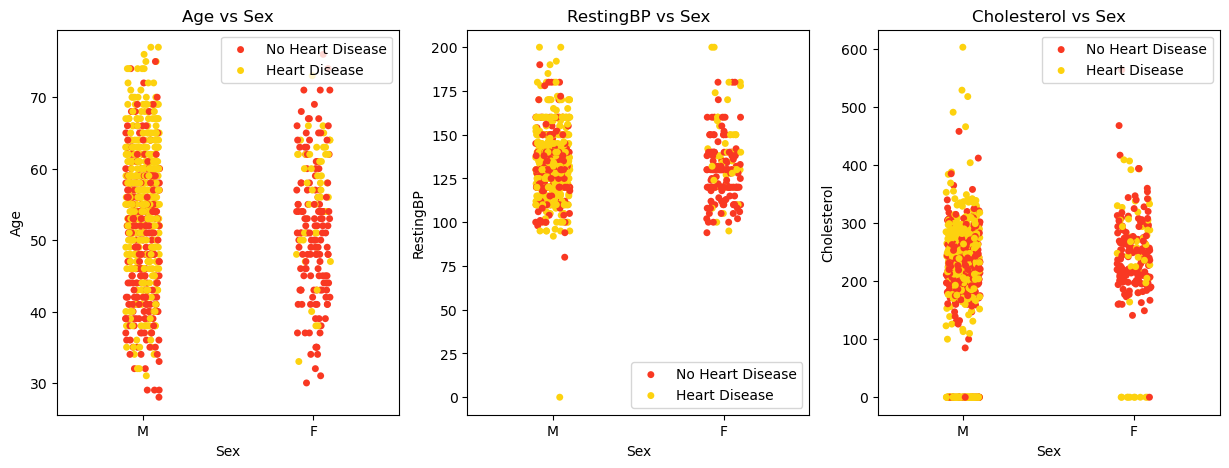

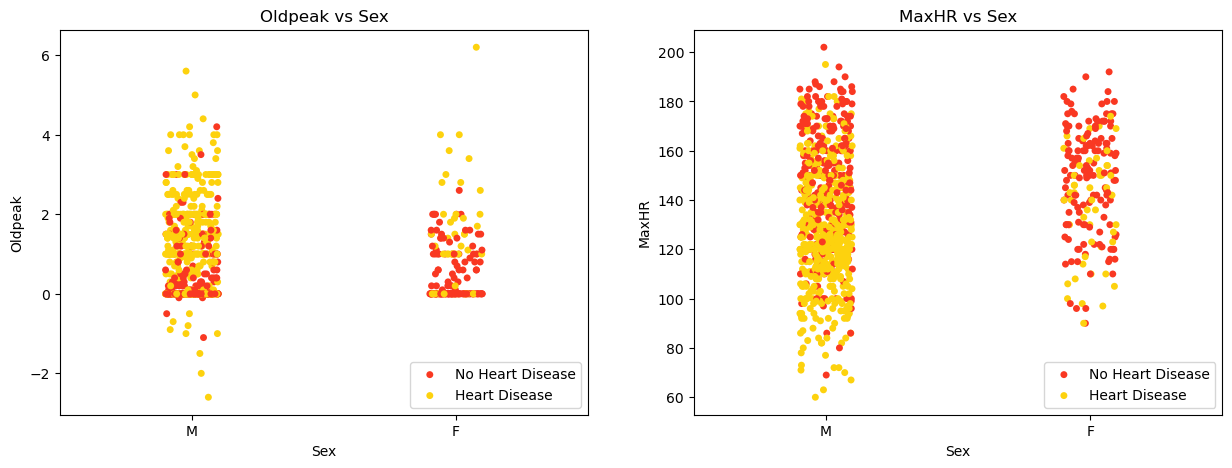

In [30]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

Grafik di atas merupakan grafik yang menggambarkan hubungan antara jenis kelamin dengan beberapa faktor gagal jantung lainnya
*   Grafik 1 menggambarkan hubungan antara **jenis kelamin dengan usia** di mana grafik menunjukkan bahwa responden pria dengan usia >50 lebih banyak yang merupakan penderita gagal jantung sedangkan responden wanita dengan usia >50 juga lebih banyak yang merupakan penderita gagal jantung
*   Grafik  2 menggambarkan hubungan antara **jenis kelamin dengan tekanan darah istirahat** di mana grafik menunjukkan bahwa responden pria dengan tekanan darah >100 lebih banyak yang merupakan penderita gagal jantung sedangkan responden wanita dengan tekanan darah >100 lebih banyak yang bukan merupakan penderita gagal jantung
*   Grafik 3 menggambarkan hubungan antara **jenis kelamin dengan kolesterol** di mana grafik menunjukkan bahwa responden pria dengan tingkat kolesterol >100 seimbang antara penderita gagal jantung dan bukan penderita sedangkan responden wanita dengan tingkat kolesterol >200 lebih banyak yang bukan merupakan penderita gagal jantung
*   Grafik 4 menggambarkan hubungan antara **jenis kelamin dengan perubahan segmen ST pada EKG** di mana grafik menunjukkan bahwa responden pria dengan tingkat oldpeak >0 lebih banyak yang merupakan penderita gagal jantung sedangkan responden wanita dengan tingkatb oldpeak >0 lebih banyak yang bukan merupakan penderita gagal jantung
*   Grafik 5 menggambarkan hubungan antara **jenis kelamin dengan detak jantung maksimal** di mana grafik menunjukkan bahwa responden pria dengan detak jantung >100 lebih banyak yang merupakan penderita gagal jantung sedangkan responden wanita dengan detak jantung >120 lebih banyak yang bukan merupakan penderita gagal jantung

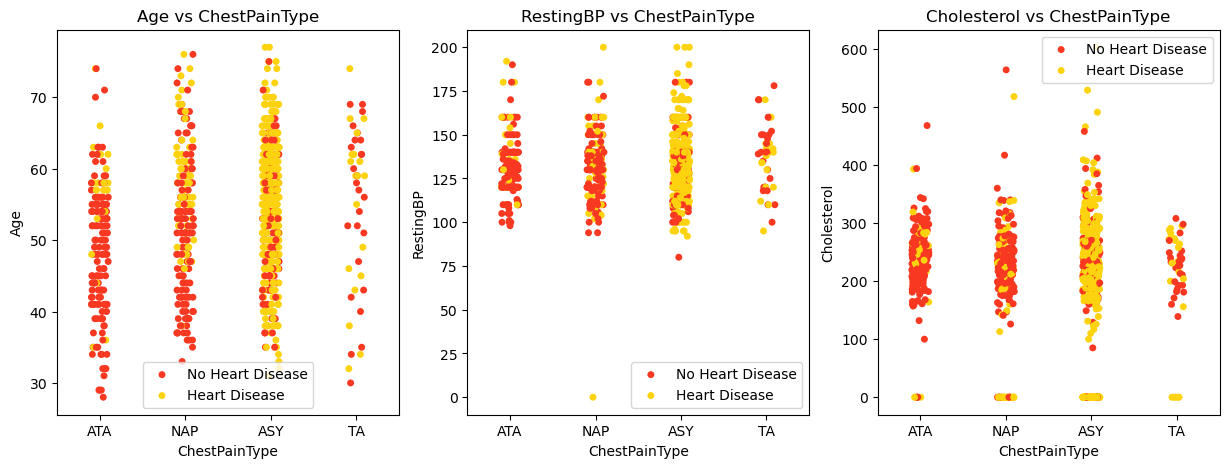

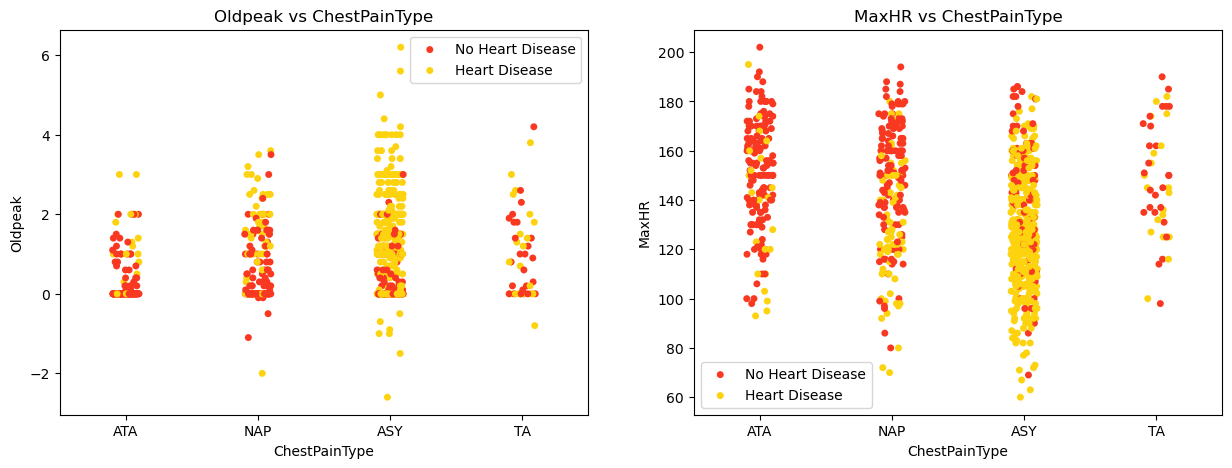

In [31]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

Grafik di atas merupakan grafik yang menggambarkan hubungan antara jenis nyeri dada dengan beberapa faktor gagal jantung lainnya
*   Grafik 1 menggambarkan hubungan antara jenis nyeri dada dengan usia di mana grafik menunjukkan bahwa banyak responden penderita gagal jantung dengan kategori nyeri dada ATA yang berusia > 60, kategori nyeri dada NAP yang berusia > 60, kategori nyeri dada ASY yang berusia > 40, kategori nyeri dada TA yang berusia > 40.
*   Grafik 2 menggambarkan hubungan antara jenis nyeri dada dengan tekanan darah istirahat di mana grafik menunjukkan bahwa responden dengan kategori nyeri dada ATA yang memiliki tekanan darah > 100 lebih banyak bukan penderita gagal jantung, kategori nyeri dada NAP yang yang memiliki tekanan darah > 100 lebih banyak bukan penderita gagal jantung, kategori nyeri dada ASY yang memiliki tekanan darah > 100 lebih banyak merupakan penderita gagal jantung, kategori nyeri dada TA yang memiliki tekanan darah > 100 seimbang antara penderita dan bukan penderita gagal jantung.
*   Grafik 3 menggambarkan hubungan antara jenis nyeri dada dengan kolesterol di mana grafik menunjukkan bahwa responden dengan kategori nyeri dada ATA dengan tingkat kolesterol > 200 lebih banyak bukan penderita gagal jantung, kategori nyeri dada NAP dengan tingkat kolesterol > 200 lebih banyak bukan penderita gagal jantung, kategori nyeri dada ASY dengan tingkat kolesterol > 200 lebih banyak penderita gagal jantung, kategori nyeri dada TA dengan tingkat kolesterol 200-300 lebih banyak bukan penderita gagal jantung.
*   Grafik 4 menggambarkan hubungan antara jenis nyeri dada dengan perubahan segmen ST pada EKG di mana grafik menunjukkan bahwa responden dengan kategori nyeri dada ATA dengan tingkat oldpeak >0 lebih banyak bukan penderita gagal jantung, kategori nyeri dada NAP dengan tingkat oldpeak >0 lebih banyak bukan penderita gagal jantung, kategori nyeri dada ASY dengan tingkat oldpeak >0 lebih banyak penderita gagal jantung, kategori nyeri dada TA dengan tingkat oldpeak >0 seimbang antara penderita dan bukan penderita gagal jantung.
*   Grafik 5 menggambarkan hubungan antara jenis nyeri dada dengan detak jantung maksimal  di mana grafik menunjukkan bahwa banyak responden penderita gagal jantung dengan kategori nyeri dada ATA dengan tingkat detak jantung > 100 lebih banyak bukan penderita gagal jantung, kategori nyeri dada NAP dengan tingkat detak jantung > 100 lebih banyak bukan penderita gagal jantung, kategori nyeri dada ASY dengan tingkat detak jantung > 100 lebih banyak penderita gagal jantung, kategori nyeri dada TA dengan tingkat detak jantung > 100 seimbang antara penderita dan bukan penderita gagal jantung.

# **Modelling (Clustering)**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans


In [55]:
# Misalkan data sudah ada dalam DataFrame df1
# Memilih fitur-fitur numerik
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Standarisasi fitur-fitur numerik
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1[numerical_features])

# Membuat DataFrame baru dengan fitur yang sudah di-scale
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)

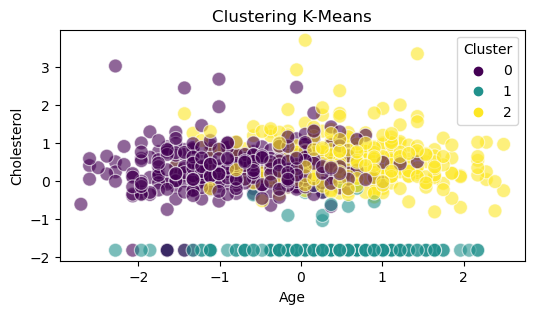

In [56]:
# Melakukan clustering dengan jumlah cluster yang optimal
optimal_clusters = 3  # Misalkan berdasarkan metode Elbow
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_df)

# Menambahkan hasil clustering ke DataFrame asli
df1['Cluster'] = clusters

# Visualisasi hasil clustering
plt.figure(figsize=(6, 3))
sns.scatterplot(x=scaled_df['Age'], y=scaled_df['Cholesterol'], hue=df1['Cluster'], palette='viridis', s=100, alpha=0.6)
plt.title('Clustering K-Means')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Cluster')
plt.show()


Grafik di atas menggambarkan klastering antara **Usia dengan Kolesterol** 

**Cluster 0 (Ungu)**: Titik-titik berwarna ungu tersebar terutama di sekitar nilai normal untuk Age dan Cholesterol. Mereka tampak lebih terpusat dan menyebar dengan rata-rata yang lebih rendah di sepanjang kedua sumbu. Cluster 0 mewakili kelompok dengan karakteristik yang lebih rata-rata atau umum dalam data (usia sedang, kolesterol sedang).

**Cluster 1 (Hijau)**: Titik-titik berwarna hijau cenderung berada di bagian bawah sumbu Y (Cholesterol) dengan rentang nilai yang lebih sempit untuk Age. Cluster 1 ini mungkin terdiri dari individu dengan kadar kolesterol yang lebih rendah dan rentang usia tertentu.

**Cluster 2 (Kuning)**: Titik-titik berwarna kuning cenderung lebih tersebar ke kanan pada sumbu X dan ke atas pada sumbu Y, menunjukkan bahwa cluster 2 ini mungkin terdiri dari individu dengan kadar kolesterol yang lebih tinggi dan usia yang lebih tua.

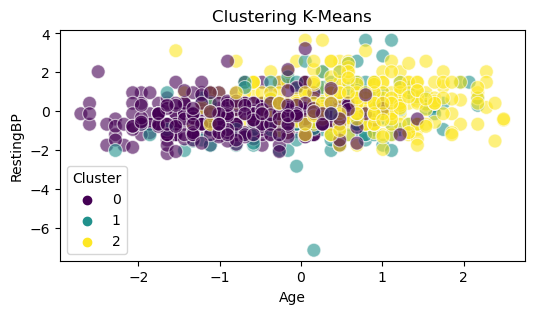

In [57]:
# Melakukan clustering dengan jumlah cluster yang optimal
optimal_clusters = 3  # Misalkan berdasarkan metode Elbow
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_df)

# Menambahkan hasil clustering ke DataFrame asli
df1['Cluster'] = clusters

# Visualisasi hasil clustering
plt.figure(figsize=(6, 3))
sns.scatterplot(x=scaled_df['Age'], y=scaled_df['RestingBP'], hue=df1['Cluster'], palette='viridis', s=100, alpha=0.6)
plt.title('Clustering K-Means')
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.legend(title='Cluster')
plt.show()

Grafik di atas menggambarkan klastering antara **Usia dengan RestingBP (tekanan darah istirahat)** 

**Cluster 0 (Ungu)**: Titik-titik berwarna ungu tersebar terutama di sekitar nilai normal untuk Age dan RestingBP. Mereka tampak lebih terpusat dan menyebar dengan rata-rata yang lebih rendah di sepanjang kedua sumbu. Cluster 0 mewakili kelompok dengan karakteristik yang lebih rata-rata atau umum dalam data (usia sedang, tekanan darah sedang).

**Cluster 1 (Hijau)**: Titik-titik berwarna hijau cenderung berada di bagian bawah sumbu Y (RestingBP) dengan rentang nilai yang lebih sempit untuk Age. Cluster 1 ini mungkin terdiri dari individu dengan tekanan darah yang lebih rendah dan rentang usia tertentu.

**Cluster 2 (Kuning)**: Titik-titik berwarna kuning cenderung lebih tersebar ke kanan pada sumbu X dan ke atas pada sumbu Y, menunjukkan bahwa cluster 2 ini mungkin terdiri dari individu dengan tekanan darah yang lebih tinggi dan usia yang lebih tua.

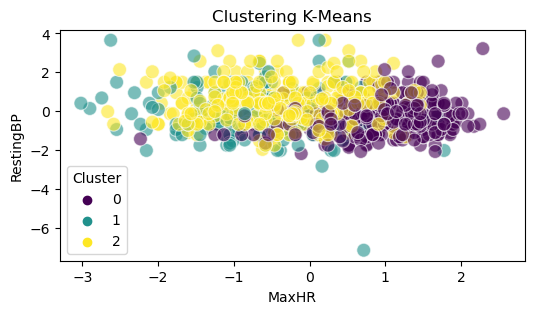

In [58]:
# Melakukan clustering dengan jumlah cluster yang optimal
optimal_clusters = 3  # Misalkan berdasarkan metode Elbow
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_df)

# Menambahkan hasil clustering ke DataFrame asli
df1['Cluster'] = clusters

# Visualisasi hasil clustering
plt.figure(figsize=(6, 3))
sns.scatterplot(x=scaled_df['MaxHR'], y=scaled_df['RestingBP'], hue=df1['Cluster'], palette='viridis', s=100, alpha=0.6)
plt.title('Clustering K-Means')
plt.xlabel('MaxHR')
plt.ylabel('RestingBP')
plt.legend(title='Cluster')
plt.show()

Grafik di atas menggambarkan klastering antara **MaxHR (detak jantung maksimum) dengan RestingBP (tekanan darah istirahat)** 

**Cluster 0 (Ungu)**: Titik-titik berwarna ungu cenderung berada di bagian kanan plot, menunjukkan responden dengan MaxHR lebih tinggi. Mereka tersebar lebih luas di sepanjang sumbu Y (RestingBP).

**Cluster 1 (Hijau)**: Titik-titik berwarna hijau cenderung berada di bagian tengah-bawah plot, menunjukkan responden dengan RestingBP yang lebih rendah dan nilai MaxHR yang bervariasi.

**Cluster 2 (Kuning)**: Titik-titik berwarna kuning tersebar di seluruh rentang MaxHR tetapi lebih terkonsentrasi di bagian tengah atas sumbu Y (RestingBP), menunjukkan responden dengan RestingBP yang lebih tinggi.

## **Logistic Regression** 

In [103]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [127]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

def model(classifier):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    prediction_proba = classifier.predict_proba(x_test)[:, 1]
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    accuracy = accuracy_score(y_test, prediction)
    cross_val = cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()
    roc_auc = roc_auc_score(y_test, prediction)
    
    print("Accuracy: {:.2%}".format(accuracy))
    print("Cross Validation Score: {:.2%}".format(cross_val))
    print("ROC_AUC Score: {:.2%}".format(roc_auc))
    
    fpr, tpr, _ = roc_curve(y_test, prediction_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def model_evaluation(classifier):
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')

    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test)))

# Example usage:
# Assuming x_train, y_train, x_test, y_test are already defined and classifier_lr is your classifier
# model(classifier_lr)
# model_evaluation(classifier_lr)


In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

C:\Users\ASUS VIVOBOOK\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS VIVOBOOK\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Accuracy: 84.78%
Cross Validation Score: 91.06%
ROC_AUC Score: 84.70%


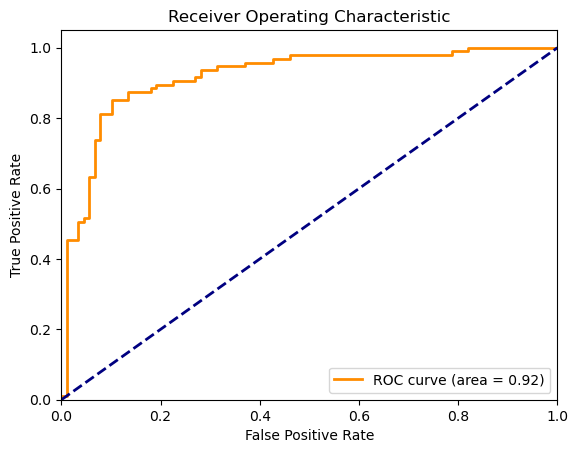

In [131]:
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        89
           1       0.84      0.87      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



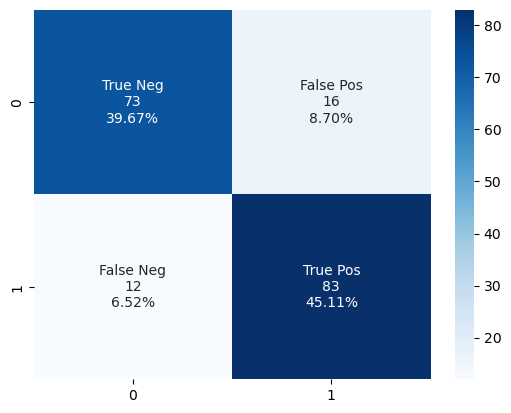

In [132]:
model_evaluation(classifier_lr)